In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [6]:
import re
import string

In [7]:
# Step 4: Preprocess (Clean) the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [8]:
df['text'] = df['text'].apply(clean_text)

In [9]:
# Step 5: Tokenize and pad sequences
max_words = 5000
max_len = 200

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [13]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['label'], test_size=0.2, random_state=42)

Buil the LSTM Model now

In [ ]:
# Step 7: Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

NOW TRAIN THE MODEL

In [15]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.7862 - loss: 0.4742 - val_accuracy: 0.9019 - val_loss: 0.3012
Epoch 2/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.8768 - loss: 0.3472 - val_accuracy: 0.8893 - val_loss: 0.3238
Epoch 3/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9229 - loss: 0.2356 - val_accuracy: 0.9707 - val_loss: 0.0976
Epoch 4/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9785 - loss: 0.0777 - val_accuracy: 0.9847 - val_loss: 0.0509
Epoch 5/5
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9880 - loss: 0.0466 - val_accuracy: 0.9863 - val_loss: 0.0459


NOW WE WILL EVALUATE IT

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9863 - loss: 0.0469
Test Accuracy: 0.9863


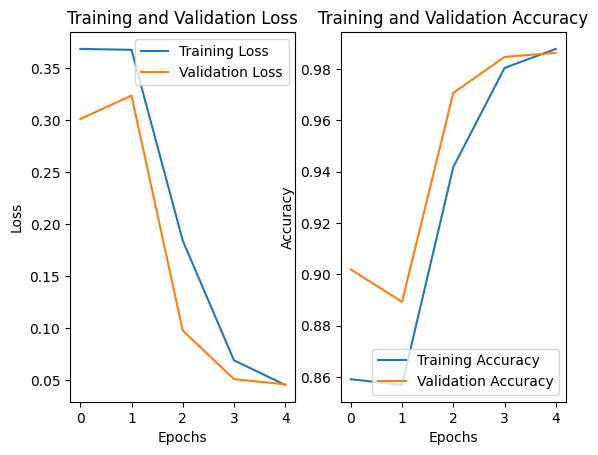

In [20]:
import matplotlib.pyplot as plt

# Get training history
history_dict = history.history

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

PREDICT CUSTOM EMAIL

In [17]:
def predict_email(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(padded)[0][0]
    print(f"Prediction Score: {pred:}")
    if pred > 0.5:
        print("This email is likely SPAM")
    else:
        print("This email is likely NOT spam")


In [18]:
test_email = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."
predict_email(test_email)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Prediction Score: 0.9836471676826477
This email is likely SPAM


In [19]:
test_email2 = "Hello team, attached is the report for this month's sales. Regards."
predict_email(test_email2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction Score: 0.0033992233220487833
This email is likely NOT spam
